# House Price Prediction - Kaggle Competition
* **Steps:**
   * Import Libraries
   * Load the Data
   * Train-Test Split
   * Data Preprocessing
   * Build the Neural Network Model
   * Model Training
   * Model Evaluation
   * Hyperparameter Tuning (Optional)
   * Prediction
   * Submission

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import optuna
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

## Load the data

In [2]:
# load the train and test data provided by kaggle
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# let's see how many columns we have
len(train.columns.to_list())

81

In [5]:
# total null data from each features
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
# correlation matrix
corr_mat = train.corr()
corr_mat

/var/folders/jh/_q3zsphn00z4nwx2cszyw4mc0000gn/T/ipykernel_94275/2956328035.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = train.corr()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


There are too many features and some have even negative correlation so lets filter the features above 30% correlation and see

In [7]:
# lets filter data with higher correlation
corr_threshold = 0.1

# filter the features based on correlation with target
target_corr = abs(corr_mat['SalePrice'])
high_corr_features = target_corr[target_corr > corr_threshold].index.tolist()

selected_train_data = train[high_corr_features]

In [8]:
# let's see what features are selected
selected_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1201 non-null   float64
 1   LotArea        1460 non-null   int64  
 2   OverallQual    1460 non-null   int64  
 3   YearBuilt      1460 non-null   int64  
 4   YearRemodAdd   1460 non-null   int64  
 5   MasVnrArea     1452 non-null   float64
 6   BsmtFinSF1     1460 non-null   int64  
 7   BsmtUnfSF      1460 non-null   int64  
 8   TotalBsmtSF    1460 non-null   int64  
 9   1stFlrSF       1460 non-null   int64  
 10  2ndFlrSF       1460 non-null   int64  
 11  GrLivArea      1460 non-null   int64  
 12  BsmtFullBath   1460 non-null   int64  
 13  FullBath       1460 non-null   int64  
 14  HalfBath       1460 non-null   int64  
 15  BedroomAbvGr   1460 non-null   int64  
 16  KitchenAbvGr   1460 non-null   int64  
 17  TotRmsAbvGrd   1460 non-null   int64  
 18  Fireplac

In [9]:
# let's see the data in pandas DataFrame
selected_train_data

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,65.0,8450,7,2003,2003,196.0,706,150,856,856,...,8,0,2003.0,2,548,0,61,0,0,208500
1,80.0,9600,6,1976,1976,0.0,978,284,1262,1262,...,6,1,1976.0,2,460,298,0,0,0,181500
2,68.0,11250,7,2001,2002,162.0,486,434,920,920,...,6,1,2001.0,2,608,0,42,0,0,223500
3,60.0,9550,7,1915,1970,0.0,216,540,756,961,...,7,1,1998.0,3,642,0,35,272,0,140000
4,84.0,14260,8,2000,2000,350.0,655,490,1145,1145,...,9,1,2000.0,3,836,192,84,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,1999,2000,0.0,0,953,953,953,...,7,1,1999.0,2,460,0,40,0,0,175000
1456,85.0,13175,6,1978,1988,119.0,790,589,1542,2073,...,7,2,1978.0,2,500,349,0,0,0,210000
1457,66.0,9042,7,1941,2006,0.0,275,877,1152,1188,...,9,2,1941.0,1,252,0,60,0,0,266500
1458,68.0,9717,5,1950,1996,0.0,49,0,1078,1078,...,5,0,1950.0,1,240,366,0,112,0,142125


array([[<Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>],
       [<Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>],
       [<Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>],
       [<Axes: title={'center': 'BedroomAbvGr'}>,
        <Axes: title={'center': 'KitchenAbvGr'}>,
        <Axes: title={'center': 'TotRmsAbvGrd'}>,
        <Axes: title={'center': 'Fireplaces'}>,
        <Axes: title={'center': 'GarageYrBlt'}>],
       [<Axes: title={'center': 'Gar

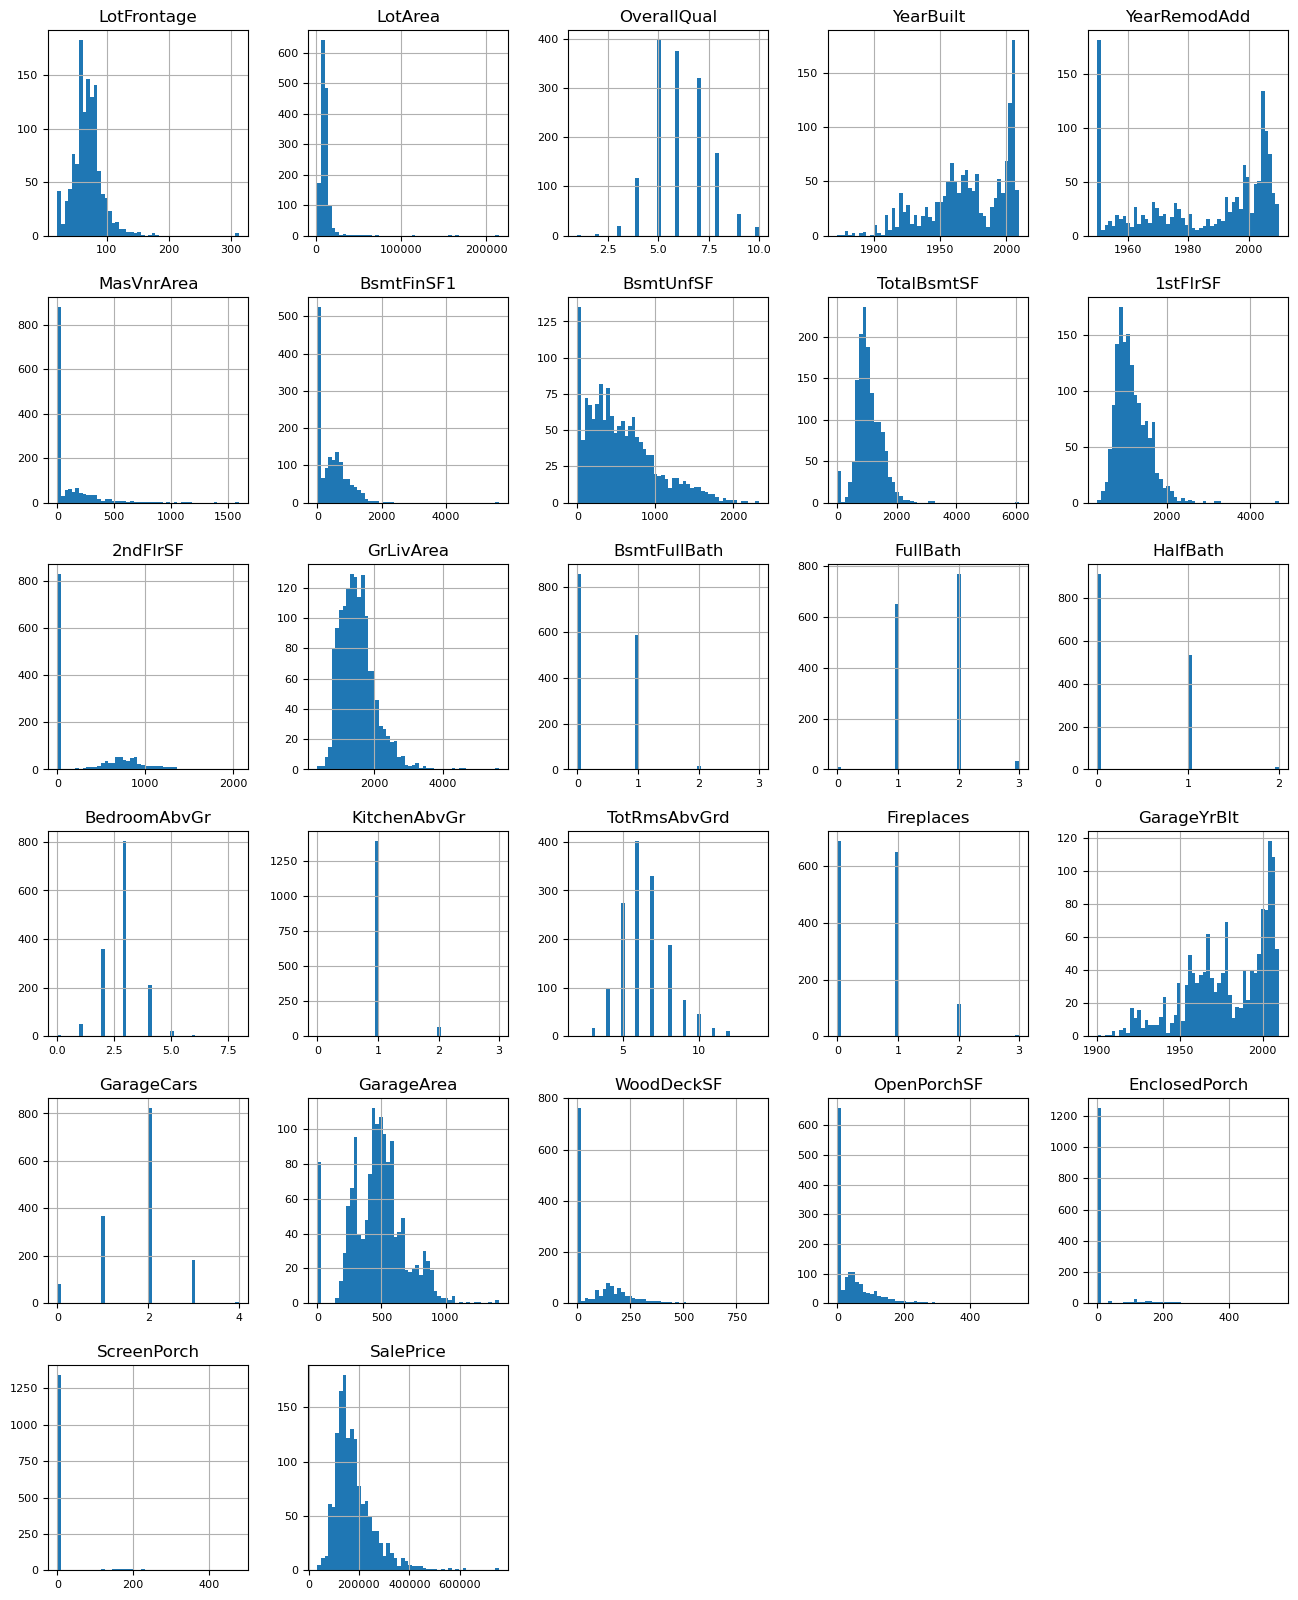

In [10]:
# let's see the histogram of our selected data
selected_train_data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

## Train Test Split
Since we have train, test data seperately, we have seperated **SalePrice** from train data to make y_train. In the data below X_train and X_test contains features with only above 0.1 correlation since there are too many features and even some have negative correlation.

In [11]:
# lets manage train test datasets
X_train = selected_train_data.drop(['SalePrice', 'GarageYrBlt', 'LotFrontage'], axis=1)
y_train = selected_train_data['SalePrice']
X_test = test[X_train.columns] # same columns as X_train

In [12]:
# let's see if they have same column
X_train.columns == X_test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [13]:
# let's check null values
X_train.isnull().sum()

LotArea          0
OverallQual      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       8
BsmtFinSF1       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
ScreenPorch      0
dtype: int64

In [14]:
# let's fill na values in MasVnrArea with mean
mean_masvnrarea = X_train['MasVnrArea'].mean()

# Fill the missing values
X_train['MasVnrArea'].fillna(mean_masvnrarea, inplace=True)

In [15]:
# again let's check null values
X_train.isnull().sum()

LotArea          0
OverallQual      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
ScreenPorch      0
dtype: int64

## Preprocessing
In this step we will be using StandardScalar for normalization because **ChatGPT** suggested:  `The House Price Prediction dataset may contain outliers, such as extreme prices. StandardScaler is not influenced by outliers because it calculates the mean and standard deviation, which are more robust to extreme values.`

In [16]:
# let's start the normalization
scalar = StandardScaler()

# let's fit he scalar with our data
scalar.fit(X_train)

# let's transform our data
X_train_norm = scalar.transform(X_train)
X_test_norm = scalar.transform(X_test)

In [17]:
# let's see the shape of our data
X_train_norm.shape

(1460, 24)

## Build the Neural Network Model

In [18]:
# set random seed
tf.random.set_seed(42)

# Define the objective function for Optuna
def objective(trial):
    # define the hyperparameters to tune
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-2, log=True)
    num_layers = trial.suggest_int('num_layers', 1, 4)
    num_units = trial.suggest_int('num_units', 1, 256)
    dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)
    
    # Create a neural network model
    model = tf.keras.Sequential()
    model.add(layers.Dense(units=num_units, activation="relu", input_dim=input_dim))
    model.add(layers.Dropout(dropout_rate))
    for _ in range(num_layers - 1):
        model.add(layers.Dense(units=num_units, activation="relu"))
        model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(1))
    
    # compile the model
    optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    
    # train the model
    history = model.fit(X_train_norm, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=0)
    
    # Get the last validation loss value from the training history
    val_loss = history.history['val_loss'][-1]
    
    # calculate the root mean squared error (RMSE) on the validation set
    val_rmse = np.sqrt(val_loss)
    
    return val_rmse
    


In [ ]:
# set the input dimension
input_dim = X_train.shape[1]

# create optuna study and optimize the objective function
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

[I 2023-07-10 21:15:00,453] A new study created in memory with name: no-name-d6ff66f9-72d0-45dd-9169-8655e22e1037
/var/folders/jh/_q3zsphn00z4nwx2cszyw4mc0000gn/T/ipykernel_94275/3294239189.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)
2023-07-10 21:15:00.618981: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
[I 2023-07-10 21:15:14,165] Trial 0 finished with value: 185878.35678206326 and parameters: {'learning_rate': 4.8425950657988634e-05, 'num_layers': 3, 'num_units': 282, 'dropout_rate': 0.11390809748856767}. Best is trial 0 with value: 185878.35678206326.
[I 2023-07-10 21:15:29,847] Trial 1 finished with value: 2277193.891999537 and parameters: {'learning_rate': 0.001516068464050628, 'num_layers': 5, 'num_units': 155, 'dropout_r

[I 2023-07-10 21:21:12,567] Trial 31 finished with value: 49397.03764397214 and parameters: {'learning_rate': 0.008752016577581725, 'num_layers': 2, 'num_units': 363, 'dropout_rate': 0.31694974919938845}. Best is trial 22 with value: 48372.36368010147.
[I 2023-07-10 21:21:24,999] Trial 32 finished with value: 61309.102227972646 and parameters: {'learning_rate': 0.006930925195763744, 'num_layers': 3, 'num_units': 342, 'dropout_rate': 0.28150265097329147}. Best is trial 22 with value: 48372.36368010147.
[I 2023-07-10 21:21:36,412] Trial 33 finished with value: 63047.055442740544 and parameters: {'learning_rate': 0.003497667793718864, 'num_layers': 2, 'num_units': 390, 'dropout_rate': 0.31904335689680335}. Best is trial 22 with value: 48372.36368010147.
[I 2023-07-10 21:21:47,642] Trial 34 finished with value: 51124.51936204389 and parameters: {'learning_rate': 0.009432890944277563, 'num_layers': 2, 'num_units': 461, 'dropout_rate': 0.37156521811897}. Best is trial 22 with value: 48372.36

[I 2023-07-10 21:27:35,685] Trial 64 finished with value: 50012.08174031551 and parameters: {'learning_rate': 0.004892234747185715, 'num_layers': 2, 'num_units': 512, 'dropout_rate': 0.3532197617532699}. Best is trial 52 with value: 47988.46528073178.
[I 2023-07-10 21:27:47,133] Trial 65 finished with value: 48961.479716201386 and parameters: {'learning_rate': 0.005621570963764609, 'num_layers': 2, 'num_units': 492, 'dropout_rate': 0.3632156603282762}. Best is trial 52 with value: 47988.46528073178.
[I 2023-07-10 21:28:25,154] Trial 66 finished with value: 66427.00559260519 and parameters: {'learning_rate': 0.005561726375439387, 'num_layers': 3, 'num_units': 496, 'dropout_rate': 0.3827257434432691}. Best is trial 52 with value: 47988.46528073178.
[I 2023-07-10 21:29:03,308] Trial 67 finished with value: 153099.3239958949 and parameters: {'learning_rate': 0.0023170427335308936, 'num_layers': 2, 'num_units': 195, 'dropout_rate': 0.40112599855038955}. Best is trial 52 with value: 47988.46

In [ ]:
# get the best hyperparameters
best_params = study.best_params

# build the final model with the best hyper parameters
final_model = keras.Sequential()
final_model.add(layers.Dense(units=best_params['num_units'], activation='relu', input_dim=input_dim))
final_model.add(layers.Dropout(best_params['dropout_rate']))
for _ in range(best_params['num_layers'] - 1):
    final_model.add(layers.Dense(units=best_params['num_units'], activation='relu'))
    final_model.add(layers.Dropout(best_params['dropout_rate']))
final_model.add(layers.Dense(1))

# Compile the final model
optimizer = keras.optimizers.Adam(learning_rate=best_params['learning_rate'])
final_model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the final model
final_model.fit(X_train_norm, y_train, epochs=100, batch_size=32, verbose=0)

# Evaluate the final model on the test set
test_loss = final_model.evaluate(X_test, y_test)

print("Test loss:", test_loss)